Перепишите автокодировщик Mnist “с нуля”  в новом ноутбуке. Можно подсматривать в ноутбук занятия, но крайне желательно писать код своими руками, а не копировать.

# Импорт библиотек

In [ ]:
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, Conv2DTranspose, concatenate, Activation, MaxPooling2D, Conv2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist, fashion_mnist 
from tensorflow.keras.callbacks import LambdaCallback

import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing import image
import numpy as np  
import pandas as pd 
from PIL import Image 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

import os 
from google.colab import drive 
import time, random
import seaborn as sns
sns.set_style('darkgrid') 

# Подключение к Гугл Диску

In [ ]:
drive.mount('/content/drive/')  

Mounted at /content/drive/


# Вспомогательные функции

## Функция создания автокодировщика

In [ ]:
def baseAutoencoder(shape=(112,80,1)): 
    img_input = Input((shape)) 

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = MaxPooling2D()(x) 

    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x) 
    z = MaxPooling2D()(x) 
    

    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(z) 
    x = BatchNormalization()(x) 
    
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
     
    x = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x) 
    x = BatchNormalization()(x) 

    x = Conv2D(shape[-1], (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    model.compile(optimizer=Adam(lr=0.0001),
                  loss='mean_squared_error')

    return model

## Функция вывода изображений

In [ ]:
def plotImages(xTrain, pred, shape=(112, 80)): 
  n = 5 
  plt.figure(figsize=(14, 7)) 
  for i in range(n): 
      index = np.random.randint(0, pred.shape[0]) 
 
      ax = plt.subplot(2, n, i + 1) 
      plt.imshow(xTrain[index].reshape(shape)) 
      plt.gray() 
      ax.get_xaxis().set_visible(False)  
      ax.get_yaxis().set_visible(False) 
 
      ax = plt.subplot(2, n, i + 1 + n) 
      plt.imshow(pred[index].reshape(shape))   
      plt.gray() 
      ax.get_xaxis().set_visible(False) 
      ax.get_yaxis().set_visible(False) 
  plt.show()

## Функция получения средней квадратичной ошибки

In [ ]:
def getMSE(x1, x2): 
  x1 = x1.flatten() 
  x2 = x2.flatten() 
  delta = x1 - x2 
  return sum(delta ** 2) / len(delta) 

In [ ]:
x1 = np.array([1, 1, 1]) 
x2 = np.array([1, 1, 1]) 
print(getMSE(x1,x2))

0.0


# Подготовка данных

In [ ]:
(xTrainMnist, yTrainMnist), (xTestMnist, yTestMnist) = mnist.load_data() 
xTrainMnist = xTrainMnist.astype('float32')/255 
xTrainMnist = xTrainMnist.reshape(-1, 28, 28, 1) 
xTestMnist = xTestMnist.astype('float32')/255 
xTestMnist = xTestMnist.reshape(-1, 28, 28, 1) 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
xTrainMnist.shape 

(60000, 28, 28, 1)

# Создание и обучение автокодировщика

In [ ]:
modelAutoMnist = baseAutoencoder((28,28,1))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
modelAutoMnist.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496 

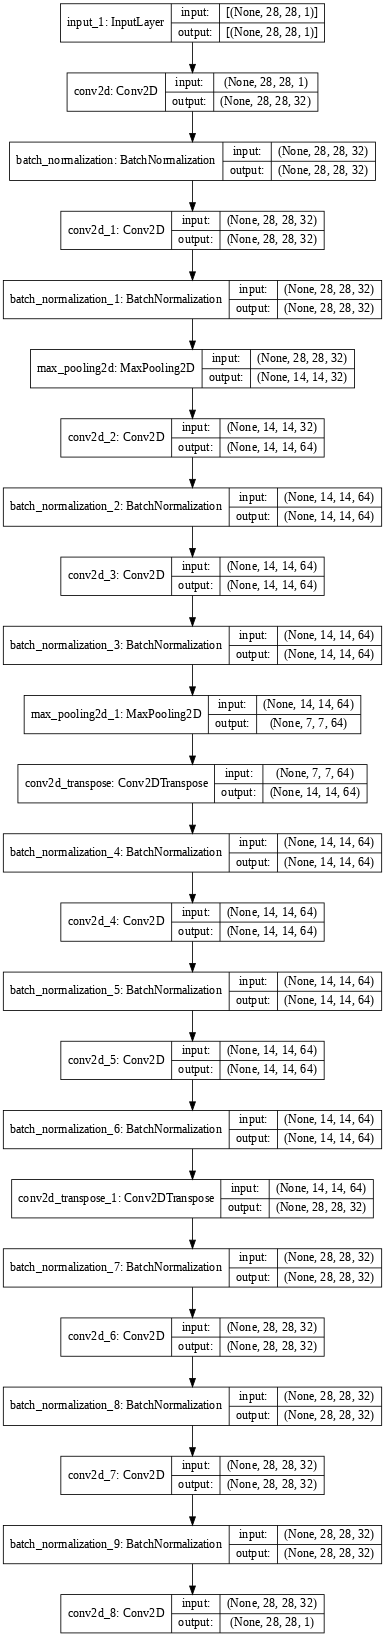

In [ ]:
utils.plot_model(modelAutoMnist, dpi=60, show_shapes=True)

In [ ]:
history = modelAutoMnist.fit(xTrainMnist, xTrainMnist, epochs=20, batch_size=256, validation_data = (xTestMnist, xTestMnist))

Epoch 1/20
235/235 [==============================] - 683s 3s/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/20
235/235 [==============================] - 683s 3s/step - loss: 0.0012 - val_loss: 0.0011
Epoch 3/20
235/235 [==============================] - 684s 3s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
235/235 [==============================] - 685s 3s/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/20
235/235 [==============================] - 685s 3s/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/20
235/235 [==============================] - 685s 3s/step - loss: 9.9448e-04 - val_loss: 9.2450e-04
Epoch 7/20
235/235 [==============================] - 686s 3s/step - loss: 9.5916e-04 - val_loss: 9.0504e-04
Epoch 8/20
235/235 [==============================] - 688s 3s/step - loss: 9.3429e-04 - val_loss: 9.8439e-04
Epoch 9/20
235/235 [==============================] - 688s 3s/step - loss: 8.9089e-04 - val_loss: 9.7346e-04
Epoch 10/20
235/235 [==============================] - 689s

# Вывод результатов обучения

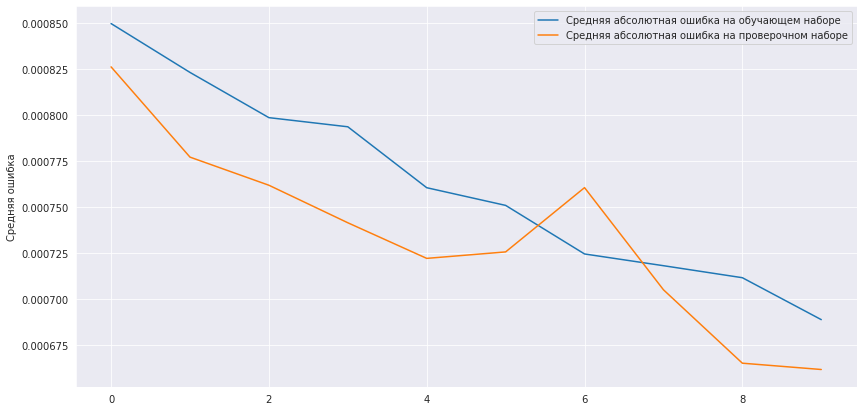

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'][10:], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [ ]:
# modelAutoMnist.save_weights('/content/drive/MyDrive/Nets/modelAutoMnist.h5') 
# modelAutoMnist.load_weights('/content/drive/MyDrive/Nets/modelAutoMnist.h5')

# Проверка на точность

In [ ]:
predMnistTest = modelAutoMnist.predict(xTestMnist) 
predMnistTest = predMnistTest * 255 
predMnistTest = predMnistTest.astype('uint8') 

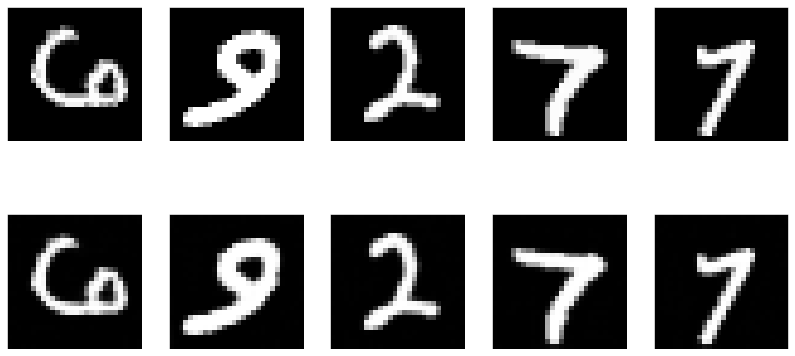

In [ ]:
plotImages(xTestMnist, predMnistTest, shape=(28,28))

In [ ]:
predMnistTrain = modelAutoMnist.predict(xTrainMnist)  
predMnistTrain = predMnistTrain * 255 
predMnistTrain = predMnistTrain.astype('uint8') 

In [ ]:
err1 = [getMSE(xTrainMnist[i], predMnistTrain[i] / 255) for i in range(len(predMnistTrain))] 
err2 = [getMSE(xTestMnist[i], predMnistTest[i] / 255) for i in range(len(predMnistTest))] 
print("Средняя ошибка на обучающем наборе MNIST:", sum(err1) / xTrainMnist.shape[0]) 
print("Средняя ошибка на тестовом наборе MNIST:", sum(err2) /xTestMnist.shape[0] ) 

Средняя ошибка на обучающем наборе MNIST: 0.0006446015607997269
Средняя ошибка на тестовом наборе MNIST: 0.0006479103808097723
